<a href="https://colab.research.google.com/github/tharasri58/diease-prediction-using-Naive-Bayes-and-/blob/main/dieasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import tests



Importing the required files

In [3]:
data = pd.read_csv('/content/Training.csv')
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


Getting the information of the dataSet

In [ ]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


DataDescription

In [4]:
data.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

Checking if there is any Null or NaH values.

In [5]:
data = data.drop(['Unnamed: 133'], axis=1)

Dropping the Null value

In [6]:
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [7]:

ordinal_enc = OrdinalEncoder()


Changing the String obj to the int values

In [8]:
data['Encoded_prognosis'] = ordinal_enc.fit_transform(data[['prognosis']])

In [9]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Encoded_prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15.0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15.0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15.0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15.0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15.0


In [10]:
Encoded_prognosis = data[["prognosis" , "Encoded_prognosis"]].drop_duplicates().sort_values(by='Encoded_prognosis')


Sorting the Prognosis

In [11]:
Encoded_prognosis

,prognosis,Encoded_prognosis
360,(vertigo) Paroymsal Positional Vertigo,0.0
60,AIDS,1.0
370,Acne,2.0
240,Alcoholic hepatitis,3.0
10,Allergy,4.0
350,Arthritis,5.0
90,Bronchial Asthma,6.0
120,Cervical spondylosis,7.0
160,Chicken pox,8.0
30,Chronic cholestasis,9.0


Displaying the Encoded prognosis.

In [12]:
data = data.drop(['prognosis'] , axis=1)

As we don't need the prognosis. we can drop the prognosis.

In [13]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Encoded_prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0


Text(0.5, 1.0, 'Correlation Graph of the Symptoms Dataset')

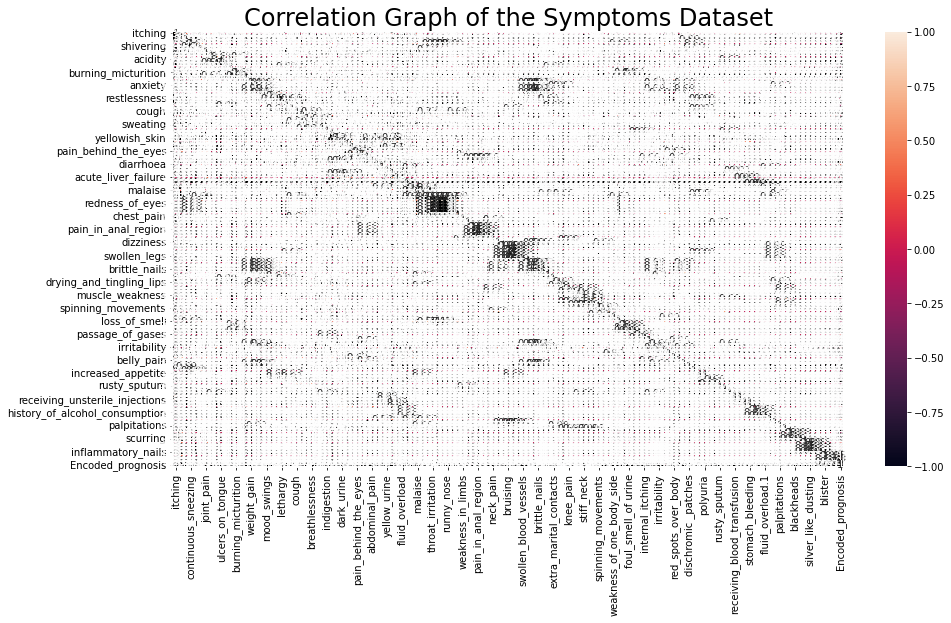

In [14]:

plt.figure(figsize=(15, 8))
correlation = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black')
correlation.set_title('Correlation Graph of the Symptoms Dataset', fontdict={'fontsize': 24})

Relation between the features.

In [15]:
X = data.drop(['Encoded_prognosis'],axis=1)

In [16]:
y = data['Encoded_prognosis']

In [17]:
y


0       15.0
1       15.0
2       15.0
3       15.0
4       15.0
        ... 
4915     0.0
4916     2.0
4917    38.0
4918    35.0
4919    27.0
Name: Encoded_prognosis, Length: 4920, dtype: float64

In [18]:
classifier = GaussianNB()  
classifier.fit(X, y)

GaussianNB()

Fitting into the Naive Bayes Algorithm

In [20]:
y_pred = classifier.predict(X)

y_pred is the testing 

In [21]:
y_pre = classifier.predict(X)

y_pre is the training 

In [23]:
print("Accuracy Score = " , accuracy_score(y , y_pre))

Accuracy Score =  1.0


In [24]:
  
classifiers= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifiers.fit(X, y)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

Now applying the Decision Tree Algorithm

In [25]:
testData = pd.read_csv('/content/Testing.csv')
testData.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


Now uploading the Testing Set.

In [26]:
testData.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

Checking if there is any Null values.

In [27]:
tX = testData.drop(['prognosis'] , axis=1)
tX

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Separting the tX

In [38]:
ty = testData['prognosis']
ty

0     15.0
1      4.0
2     16.0
3      9.0
4     14.0
5     33.0
6      1.0
7     12.0
8     17.0
9      6.0
10    23.0
11    30.0
12     7.0
13    32.0
14    28.0
15    29.0
16     8.0
17    11.0
18    37.0
19    40.0
20    19.0
21    20.0
22    21.0
23    22.0
24     3.0
25    36.0
26    10.0
27    34.0
28    13.0
29    18.0
30    39.0
31    26.0
32    24.0
33    25.0
34    31.0
35     5.0
36     0.0
37     2.0
38    38.0
39    35.0
40    27.0
41    15.0
Name: prognosis, dtype: float64

Separting the tY

In [39]:
pred = classifier.predict(tX)


Testing the 

In [40]:
print("Accuracy =", accuracy_score(ty, pred))

Accuracy = 1.0


In [41]:
predi = classifiers.predict(tX)

In [42]:
print("Accuracy =", accuracy_score(ty, predi))

Accuracy = 1.0


In [43]:
testData['prognosis'] = ordinal_enc.fit_transform(testData[['prognosis']])

In [44]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(ty, pred) 
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])